<a href="https://colab.research.google.com/github/pjh4859/Jae-Hee-Park/blob/master/20190907.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=(3,3),padding=1) # 1x28x28 -> 32x28x28
    # o = (i - k +2p) //2 + 1
    self.layer2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3),padding=1,stride=2)# 64x14x14
    self.layer3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),padding=1,stride=2)#128x7x7
    
    self.global_avg_pooling = nn.AdaptiveAvgPool2d((1,1)) # 128x1x1
    self.fc_layer = nn.Linear(128,10) #Bx
    
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=F.relu(self.layer3(x))
    
    x=self.global_avg_pooling(x)
    x=x.squeeze() #Bx128x1x1 -> Bx128
    x=self.fc_layer(x)
    return x
    
transforms = Compose([ToTensor(), # -> [0,1]
                     Normalize(mean=[0.5], std=[0.5])]) # -> [-1,1]

dataset = MNIST(root='.', download=True, transform=transforms, train=True)

data_loader = DataLoader(dataset=dataset, batch_size=64, shuffle=True)

model= CNN()

criterion = nn.CrossEntropyLoss() #loss function

optim = torch.optim.Adam(model.parameters(), lr=0.01)
list_loss = list()

for epoch in range(10):
  for input, label in tqdm(data_loader):
    results= model(input)
    loss=criterion(results, label)
    list_loss.append(loss.item())
    
    optim.zero_grad()
    loss.backward()
    optim.step()#여기서 파라미터들의 값이변함   
    
    
  break 

100%|██████████| 938/938 [01:51<00:00,  8.41it/s]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


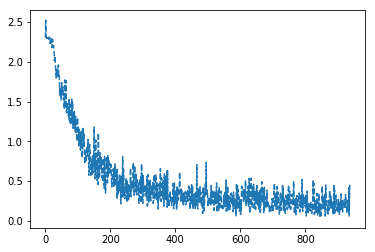

In [13]:
plt.figure()
plt.plot(range(len(list_loss)), list_loss, linestyle='--')
plt.show()